# Titanic Dataset

The sinking of the Titanic is one of the most infamous shipwrecks in history. 

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

### Data

Titanic DataSet obtained from Kaggle: https://www.kaggle.com/c/titanic

### Goal

Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## 1.0 Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [475]:
df = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')

In [7]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## 2.0 Exploratory Data Analysis

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


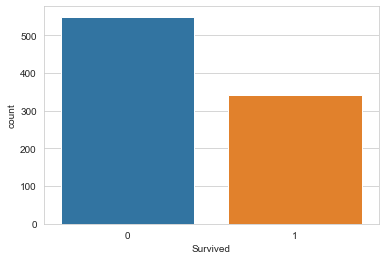

In [13]:
sns.set_style('whitegrid')

# Survived vs Did not Survive
sns.countplot(x='Survived', data=df)

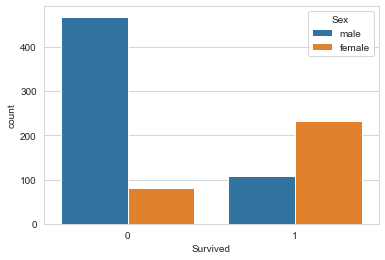

In [14]:
# Who survived relative to Sex
sns.countplot(x='Survived', hue = "Sex", data=df)

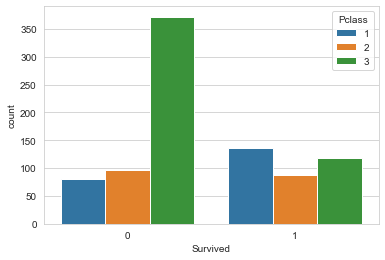

In [16]:
# Who survived based on passenger class?
sns.countplot(x='Survived', hue='Pclass', data=df)

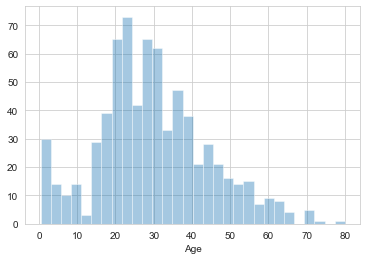

In [17]:
# Age distribution on the titanic
sns.distplot(df['Age'].dropna(), kde = False, bins=30)


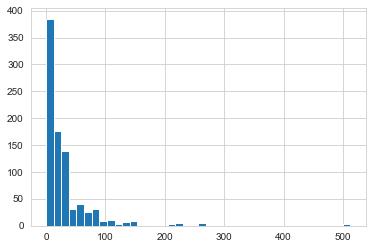

In [18]:
# What was the cost of fair distribution
df['Fare'].hist(bins=40)

In [395]:
#defining a function to determine who is a child (children are less than 16 yo.)
def male_female_child(passenger):
    #separating the two columns (sex and age) into two objects
    sex,age = passenger
    #checking if the age is < 16
    if age < 16:
        #setting the new value as 'child'
        return 'child'
    else:
        #setting the new value as the previous one
        return sex

In [396]:
#applying the male_female_child method to a new column called person by passing the sex and age columns
df['person'] = df[['Sex','Age']].apply(male_female_child,axis=1)
df_test['person'] = df_test[['Sex','Age']].apply(male_female_child,axis=1)

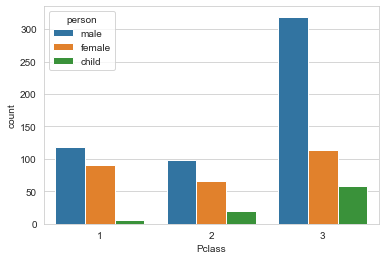

In [23]:
# The people in the classes
sns.countplot(x='Pclass', hue='person', data=df)

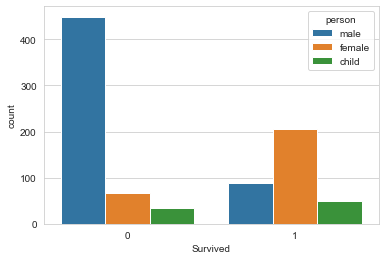

In [24]:
# The people in the classes
sns.countplot(x='Survived', hue='person', data=df)

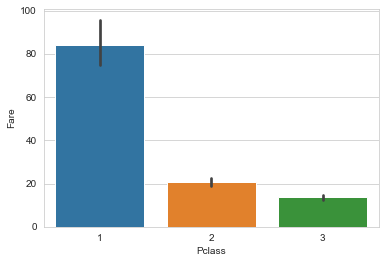

In [25]:
# Fare variation with Passenger Class
sns.barplot(x='Pclass',y='Fare',data=df)

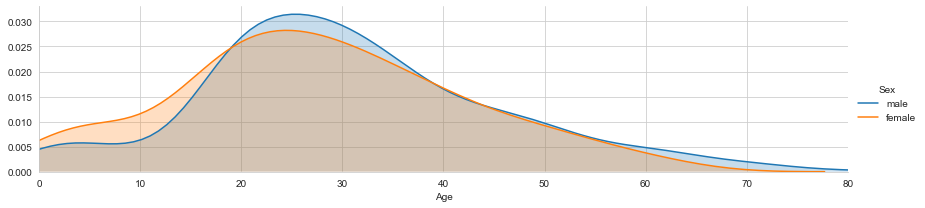

In [28]:
#creating a fig object and defining the data and the hue value
fig = sns.FacetGrid(df,hue='Sex',aspect=4)

#setting the plot type to a kde plot and the age column as the x axis
fig.map(sns.kdeplot,'Age',shade=True)

#getting the age of the oldest person in the dataset
oldest = df['Age'].max()

#setting the x axis limit
fig.set(xlim=(0,oldest))

#adding a legend to the plot
fig.add_legend()

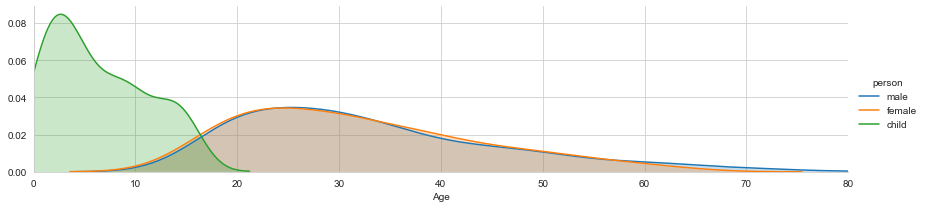

In [30]:
#creating a fig object and defining the data and the hue value
fig = sns.FacetGrid(df,hue='person',aspect=4)

#setting the plot type to a kde plot and the age column as the x axis
fig.map(sns.kdeplot,'Age',shade=True)

#getting the age of the oldest person in the dataset
oldest = df['Age'].max()

#setting the x axis limit
fig.set(xlim=(0,oldest))

#adding a legend to the plot
fig.add_legend()

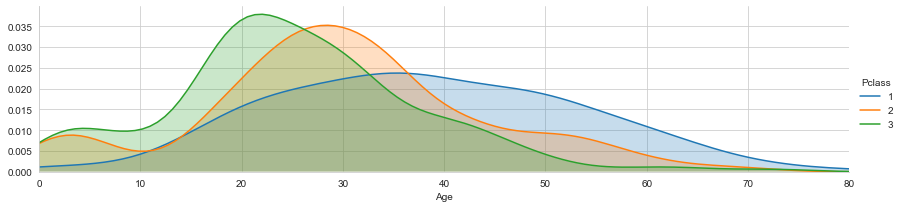

In [31]:
#creating a fig object and defining the data and the hue value
fig = sns.FacetGrid(df,hue='Pclass',aspect=4)

#setting the plot type to a kde plot and the age column as the x axis
fig.map(sns.kdeplot,'Age',shade=True)

#getting the age of the oldest person in the dataset
oldest = df['Age'].max()

#setting the x axis limit
fig.set(xlim=(0,oldest))

#adding a legend to the plot
fig.add_legend()

## 3.0 Data Pre-Processing

### 3.1 Missing Data

In [123]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

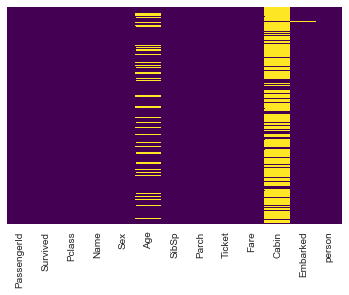

In [36]:
# Visualise missing data
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [47]:
# We can impute the missing age data by taking the average ages from the passenger class
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [476]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    
    return Age

In [477]:
df['Age'] = df[['Age','Pclass']].apply(impute_age, axis=1)
df_test['Age'] = df_test[['Age','Pclass']].apply(impute_age, axis=1)

In [478]:
#df.isnull().sum()


In [479]:
# There is too much missing cabin data and no way to complete the missing, therefore the feature is dropped
df.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

In [480]:
# The two missing embarked examples can be removed
df = df.dropna()

In [481]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [482]:
df_test.groupby('Pclass')['Fare'].mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [483]:
# What is the Passenger class for the missing fare
df_test[df_test['Fare'].isnull() == True]['Pclass']


152    3
Name: Pclass, dtype: int64

In [484]:
df_test['Fare'].iloc[152]

nan

In [485]:
# Update cell with mean of fare for class 3
df_test.at[152, 'Fare'] = 12.459

In [486]:
df_test['Fare'].iloc[152]

12.459

In [487]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 3.2 Categorical and Dummy Variables

In [488]:
# Convert Sex and Embarked data to numerical/dummy data
sex = pd.get_dummies(df['Sex'], drop_first=True)
embark = pd.get_dummies(df['Embarked'], drop_first=True)

sex = pd.get_dummies(df_test['Sex'], drop_first=True)
embark = pd.get_dummies(df_test['Embarked'], drop_first=True)

In [489]:
# Concatenate on to df
df = pd.concat([df,sex,embark], axis = 1)
df_test = pd.concat([df_test,sex,embark], axis = 1)

In [490]:
df.drop(['Sex','Embarked','PassengerId','Name','Ticket'], axis=1, inplace=True)
df_test.drop(['Sex','Embarked','PassengerId','Name','Ticket'], axis=1, inplace=True)

In [491]:
df.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,1.0,0.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,1.0


In [492]:
df_test.head(2)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1


# 4.0 Model Building

### 4.1 Train Test Split

In [493]:
X = df.drop('Survived', axis=1)
y = df['Survived']
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [494]:
X_test = df_test

### 4.2 Create Model

In [495]:
from sklearn.linear_model import LogisticRegression

In [496]:
logmodel = LogisticRegression()

In [497]:
logmodel.fit(X_train, y_train)

C:\Users\Mike\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [498]:
predictions = logmodel.predict(X_test)

### 4.3 Evaluate Model Performance

In [301]:
from sklearn.metrics import classification_report, confusion_matrix

In [199]:
#print(classification_report(y_test,predictions))

In [200]:
#print(confusion_matrix(y_test,predictions))

In [312]:
df_test_for_passengerId = pd.read_csv('titanic_test.csv')

In [317]:
df_test_for_passengerId['PassengerId']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [304]:
df_predictions = pd.DataFrame(predictions)

In [322]:
#df_predictions.insert(0,column='PassengerId', value=df_test_for_passengerId['PassengerId'].values)

In [328]:
df_predictions.rename(columns = {0:'Survived'}, inplace = True)

In [330]:
df_predictions.to_csv('Titanic_Predictions_MRG')

In [329]:
df_predictions.head(2)

,PassengerId,Survived
0,892,0
1,893,0


#### Improvements

1. Include the children as a feature, they are more likely to survive
2. Consider whether passengers are travelling alone or with family. Passengers with families are more likely to survive.